# Prophet Model

In [2]:
#Libraries Required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#Libraries for Forecasting
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
from fbprophet import Prophet

## Additive & Multiplicative Prophet Models

Prophet with **The Additive Model**, that we used here for the purpose of building the Model:
y(t) = g(t) + s(t) + h(t) + e(t),

where: 
* g(t) represents trend
* s(t) represents periodic component
* h(t) holiday related events or may be social distancing in this case. 
* e(t) is the error

Prophet with **The Multiplicative Model**:
y(t) = g(t) * s(t) * h(t) * e(t)

For the purpose of understanding the data, ran the Models with both Additive and Multiplicative Models. Usually **Multiplicative Models** are used when the magnitude of the seasonal pattern in the data depends on the magnitude of the data. Whereas **Additive Models** are usually used when the magnitude of seasonality does not change in relation to time. In this case so far we are still in the Initial Stage of the Data and we are yet to see the actual seasonal change over the behaviour on the data. So, it is a better practise to go with a Model that won't overfit the Model's Performance. 

In [4]:
# Loading the dataframe
covid19 = pd.read_csv("C:\\Users\\c08578\\Documents\\novel-corona-virus-2019-dataset\\New Version of Data\\novel-corona-virus-2019-dataset-2\\Results From EDA\\covid19_timeseries.csv")

## Confirmed Cases Forecasting

In [5]:
#Prophet Models
covid19.head()

# Prophet Requires columns ds (Dates) and y (value)
covid19confirmedcases = covid19.rename(columns={'Dates': 'ds', 'Confirmed Cases': 'y'})

# Let's Drop columns Death Cases & Recovered Cases for this dataframe
covid19confirmedcases.drop(['Death Cases', 'Recovered Cases'], axis=1, inplace=True)
covid19confirmedcases.head()

# Fitting Model
# changepoint_prior_scale can help to achieve a better fit by reducing uncertainty, Prophet Documentation suggest the scale at 0.5
m=Prophet(changepoint_prior_scale=0.25, seasonality_mode='additive', daily_seasonality=True, yearly_seasonality=True)
m.fit(covid19confirmedcases)

# Future dataframe with 1 year of data for each day
future_covid19confirmedcases=m.make_future_dataframe(periods=90, freq='D')
#Checking how the dataframe looks like
#future_covid19confirmedcases.tail()
# Make predictions
forecast_covid19confirmedcases=m.predict(future_covid19confirmedcases)

The Model Uncertainty shows the Predicted value in terms of 'yhat'. This forecast model definitely consists of a lot of uncertainty in terms of the predicted interval as well as the upper and lower predicted uncertainty intervals. Definitely a good time to find a way to **DECREASE** uncertainty. First we will try by increasing the changepoint prior scale.

In [6]:
# Checking Model Uncertainty
forecast_covid19confirmedcases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
22789,2020-07-11,12455.142854,-5868.596615,31208.256464
22790,2020-07-12,12555.900469,-5592.527762,31805.929208
22791,2020-07-13,12639.417744,-7708.741302,32716.287900
22792,2020-07-14,12718.012232,-6482.283830,33710.985189
22793,2020-07-15,12798.857478,-6648.330220,32110.940493


### Predictions Plot for Confirmed Cases

Text(0.5, 1.0, 'Forecasting of Confirmed Cases')

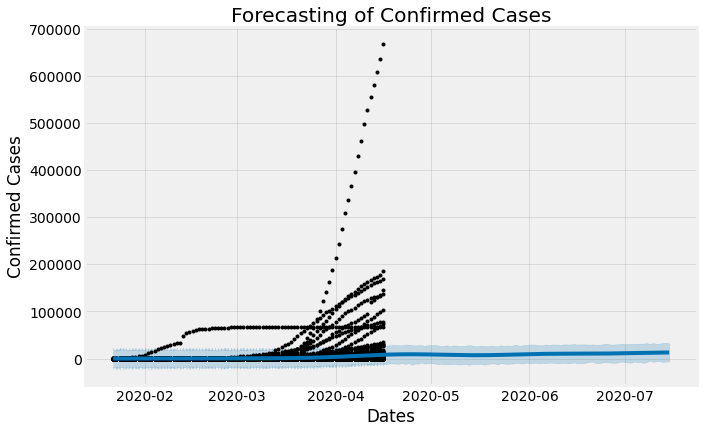

In [7]:
from fbprophet.plot import add_changepoints_to_plot

# Helps in addressing the Type Error for dates
pd.plotting.register_matplotlib_converters()

# Plotting
fig_confirmed = m.plot(forecast_covid19confirmedcases, uncertainty=True, xlabel = 'Dates', ylabel = 'Confirmed Cases')
plt.title('Forecasting of Confirmed Cases')

### Seasonal Components of Confirmed Cases

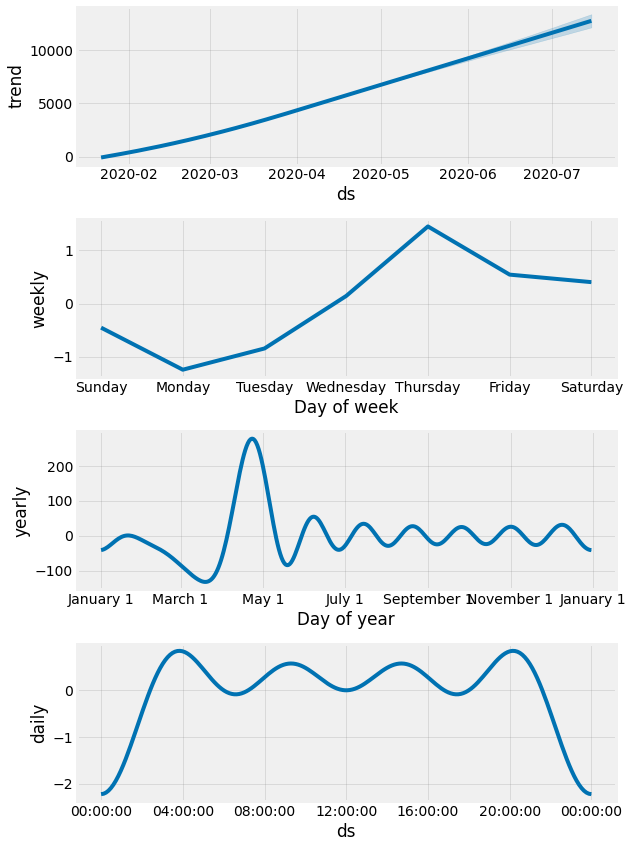

In [12]:
## Plot Model Components
fig = m.plot_components(forecast_covid19confirmedcases)

## Death Cases Forecasting

In [13]:
#Prophet Models
covid19.head()

# Prophet Requires columns ds (Dates) and y (value)
covid19deathcases = covid19.rename(columns={'Dates': 'ds', 'Death Cases': 'y'})

# Let's Drop columns Death Cases & Recovered Cases for this dataframe
covid19deathcases.drop(['Confirmed Cases', 'Recovered Cases'], axis=1, inplace=True)
covid19deathcases.head()

# Fitting Model
# changepoint_prior_scale can help to achieve a better fit by reducing uncertainty, Prophet Documentation suggest the scale at 0.5
m=Prophet(changepoint_prior_scale=0.25, seasonality_mode='additive', daily_seasonality=True, yearly_seasonality=True)
m.fit(covid19deathcases)

# Future dataframe with 1 year of data for each day; Periods tell the Number of Days till when we would like to see the Forecast
future_covid19deathcases=m.make_future_dataframe(periods=90, freq='D')
#Checking how the dataframe looks like
#future_covid19confirmedcases.tail()
# Make predictions
forecast_covid19deathcases=m.predict(future_covid19deathcases)

In [14]:
# Checking Model Uncertainty
forecast_covid19deathcases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
22789,2020-07-11,764.843899,-510.075555,1988.969119
22790,2020-07-12,772.060076,-446.804280,2018.800640
22791,2020-07-13,778.399186,-385.702399,1972.590755
22792,2020-07-14,784.941911,-404.643388,2000.174363
22793,2020-07-15,791.068110,-369.900107,1998.921781


### Prediction Plot for Death Cases


Text(0.5, 1.0, 'Forecasting of Death Cases')

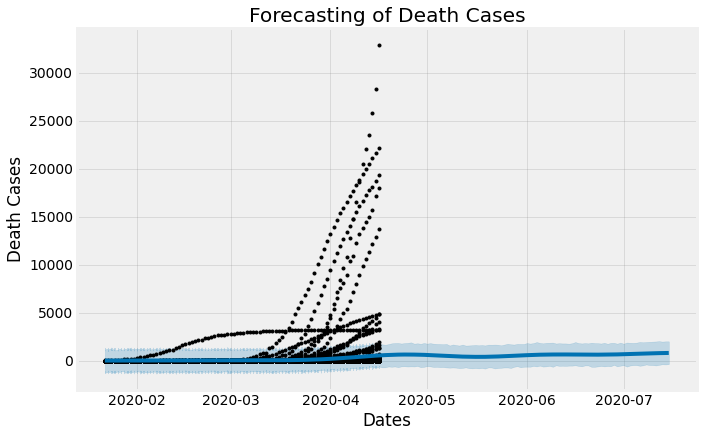

In [15]:
from fbprophet.plot import add_changepoints_to_plot

# Helps in addressing the Type Error for dates
pd.plotting.register_matplotlib_converters()

# Plotting
fig_death = m.plot(forecast_covid19deathcases, xlabel = 'Dates', ylabel = 'Death Cases')
plt.title('Forecasting of Death Cases')

### Seasonal Components of Death Cases

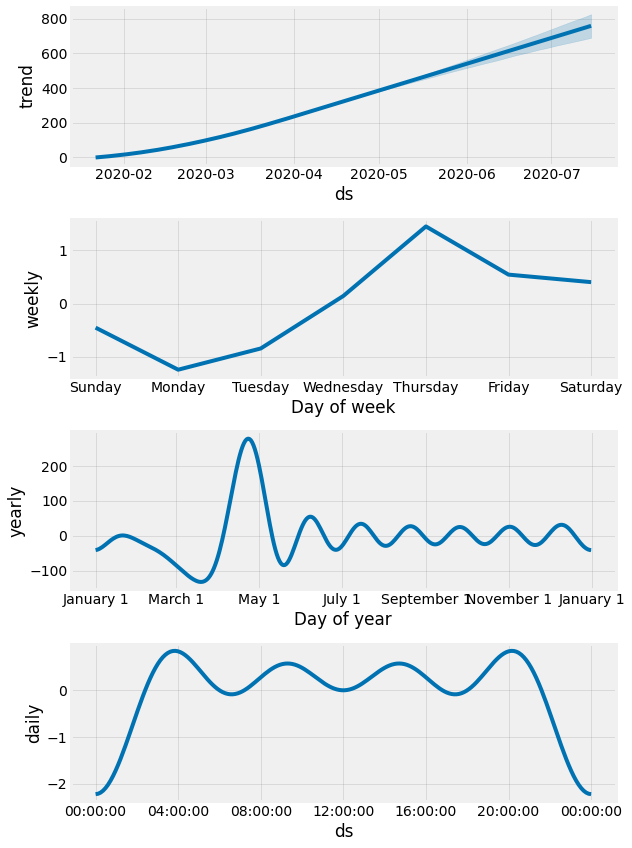

In [16]:
## Plot Model Components
fig1 = m.plot_components(forecast_covid19deathcases)

## Recovered Cases Forecasting


In [17]:
#Prophet Models
covid19.head()

# Prophet Requires columns ds (Dates) and y (value)
covid19recoveredcases = covid19.rename(columns={'Dates': 'ds', 'Recovered Cases': 'y'})

# Let's Drop columns Death Cases & Recovered Cases for this dataframe
covid19recoveredcases.drop(['Confirmed Cases', 'Death Cases'], axis=1, inplace=True)
covid19recoveredcases.head()

# Fitting Model
# changepoint_prior_scale can help to achieve a better fit by reducing uncertainty, Prophet Documentation suggest the scale at 0.5
m=Prophet(changepoint_prior_scale=0.25, seasonality_mode='additive', daily_seasonality=True, yearly_seasonality=True)
m.fit(covid19recoveredcases)

# Future dataframe with 1 year of data for each day
future_covid19recoveredcases=m.make_future_dataframe(periods=90, freq='D')
#Checking how the dataframe looks like
#future_covid19confirmedcases.tail()
# Make predictions
forecast_covid19recoveredcases=m.predict(future_covid19recoveredcases)

In [18]:
# Checking Model Uncertainty
forecast_covid19recoveredcases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
22789,2020-07-11,1981.055927,-2985.774501,6874.789381
22790,2020-07-12,2009.020688,-2373.305957,7023.943242
22791,2020-07-13,2073.879980,-2563.597080,7025.337979
22792,2020-07-14,2087.756013,-2353.633548,6908.175432
22793,2020-07-15,2100.610024,-2634.330419,6988.606762


### Prediction Plot for Recovered Cases

Text(0.5, 1.0, 'Forecasting of Recovered Cases')

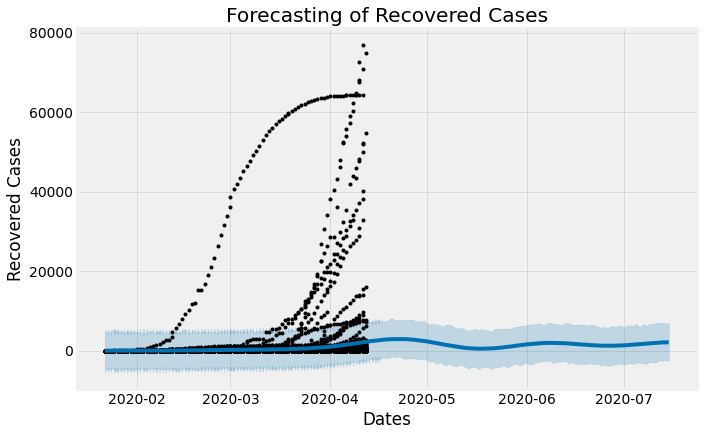

In [19]:
from fbprophet.plot import add_changepoints_to_plot

# Helps in addressing the Type Error for dates
pd.plotting.register_matplotlib_converters()

# Plotting
fig_death = m.plot(forecast_covid19recoveredcases, xlabel = 'Dates', ylabel = 'Recovered Cases')
plt.title('Forecasting of Recovered Cases')

### Seasonal Componenets of Recovered Cases

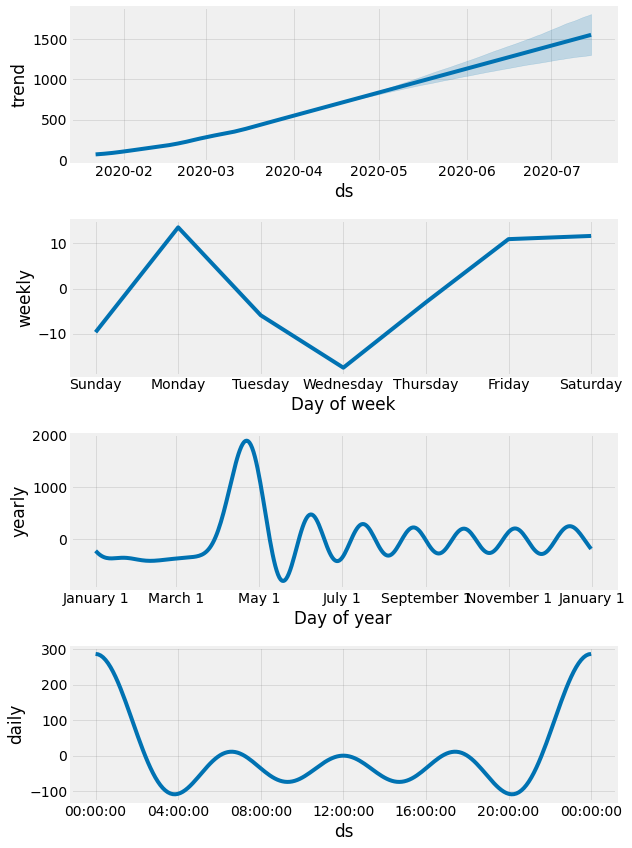

In [20]:
## Plot Model Components
fig1 = m.plot_components(forecast_covid19recoveredcases)

## Combined Forecasting for Confirmed, Death & Recovered Cases

In [21]:
confirmedcases_names = ['confirmedcases_%s' % column for column in forecast_covid19confirmedcases.columns]
deathcases_names = ['deathcases_%s' % column for column in forecast_covid19deathcases.columns]
recoveredcases_names = ['recoveredcases_%s' % column for column in forecast_covid19recoveredcases.columns]

# Dataframes to merge
merge_confirmedcases_forecast = forecast_covid19confirmedcases.copy()
merge_deathcases_forecast = forecast_covid19deathcases.copy()
merge_recoveredcases_forecast = forecast_covid19recoveredcases.copy()

# Rename the columns
merge_confirmedcases_forecast.columns = confirmedcases_names
merge_deathcases_forecast.columns = deathcases_names
merge_recoveredcases_forecast.columns = recoveredcases_names

## Cross Validation

Cross Validation just automates the process of Model Performance. The first parameter given is the trained model m (not the data). Then the next parameter prediction *horizon* - how frequently we want to predict (in this case '30 days'). Then give an *initial* (how long to train before starting the tests) and a *period* (how frequently to stop and do a prediction). If we don't provide these parameter values, Prophet will assign defaults of **initial = 3 * horizon, and cutoffs every half a horizon.** 

In [39]:
from fbprophet.diagnostics import cross_validation
df = cross_validation(m, initial='7 days', period='5 days', horizon='30 days')
#df_cv.head()

INFO:fbprophet:Making 9 forecasts with cutoffs between 2020-02-02 00:00:00 and 2020-03-13 00:00:00


## Performance Evaluation

The *performance_metrics* utility can be used to compute some useful statistics of the prediction performance (yhat, yhat_lower, and yhat_upper compared to y), as a function of the distance from the cutoff (how far into the future the prediction was). The statistics computed are mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE), and coverage of the yhat_lower and yhat_upper estimates. These are computed on a rolling window of the predictions in df after sorting by horizon (ds minus cutoff). 

In [47]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

df_p = performance_metrics(df)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,3 days,4.332479e+06,2081.460894,252.056986,inf,0.976426
1,4 days,4.650458e+06,2156.492148,264.056364,inf,0.974182
2,5 days,4.973048e+06,2230.033279,276.705522,inf,0.962940
3,6 days,5.581983e+06,2362.621985,291.670399,inf,0.928078
4,7 days,5.882905e+06,2425.470135,304.121734,inf,0.893134


## Error Visualization

Cross Validation Performance Metrics can be visualized with *plot_cross_validation_metric*, here shown for MAE. The blue line shows the MAE, where the mean is taken over a rolling window of the dots. There is almost zero errors uptil 1 month, and then seems like the error would gradually increase with the number of days. 

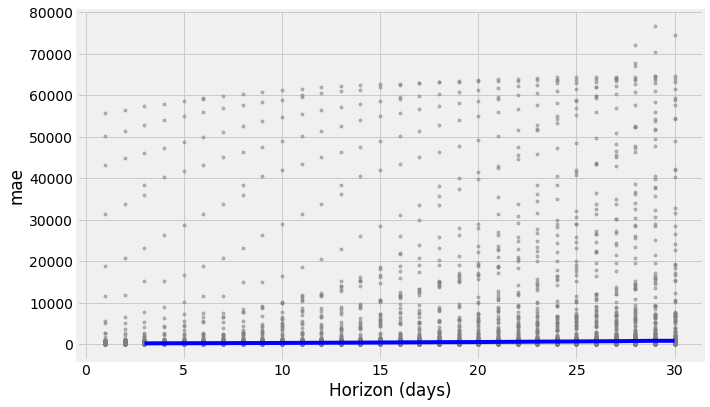

In [49]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df, metric='mae')